## Analyze the shopping trend dataset by answering the questions below.
> **IMPORTANT** write your insights after each question

In [ ]:
n

# Read the data

In [ ]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "shopping_trends_updated.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "iamsouravbanerjee/customer-shopping-trends-dataset",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  https://github.com/Kaggle/kagglehub/blob/main/README.mdkaggledatasetadapterpandas
)

df.head()

C:\Users\dell\AppData\Local\Temp\ipykernel_8356\1162196871.py:10: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


### Question 1
What is the distribution of `Purchase Amount (USD)` for different `Subscription Status` values?
- Plot using both **Seaborn’s `boxplot` and Matplotlib’s histogram**.
- Are there any outliers?

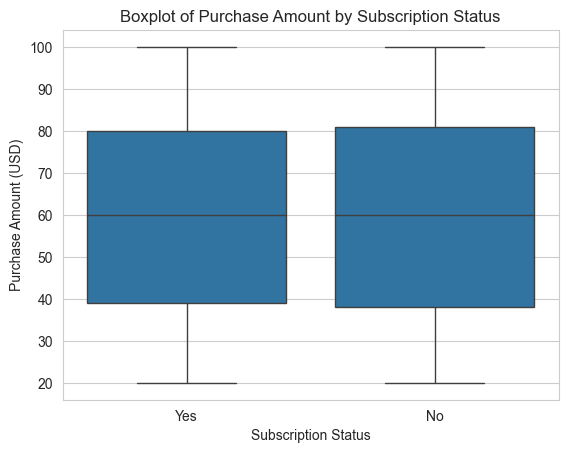

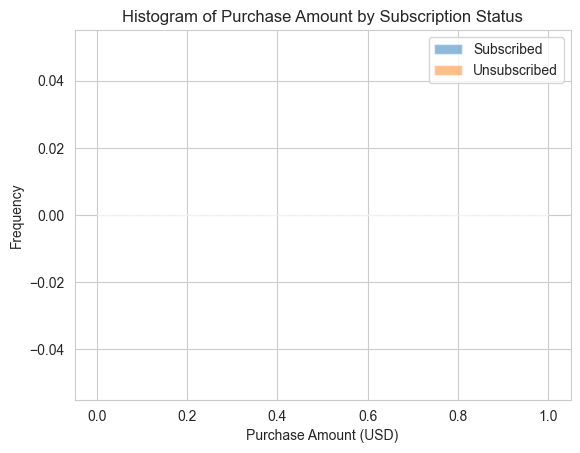

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# Create a boxplot using Seaborn
# plt.figure(figsize=(12, 6))
sns.boxplot(x='Subscription Status', y='Purchase Amount (USD)', data=df)
plt.title('Boxplot of Purchase Amount by Subscription Status')
plt.show()

# Create a histogram using Matplotlib
# plt.figure(figsize=(12, 6))
plt.hist(df[df['Subscription Status'] == 'Subscribed']['Purchase Amount (USD)'], bins=30, alpha=0.5, label='Subscribed')
plt.hist(df[df['Subscription Status'] == 'Unsubscribed']['Purchase Amount (USD)'], bins=30, alpha=0.5, label='Unsubscribed')
plt.title('Histogram of Purchase Amount by Subscription Status')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Frequency')
plt.legend()
plt.show()



### Question 2
Compare the frequency of each `Payment Method` across the dataset **from highest to lowest** .
- Use both **Seaborn's `countplot`** and **Matplotlib's bar plot**.

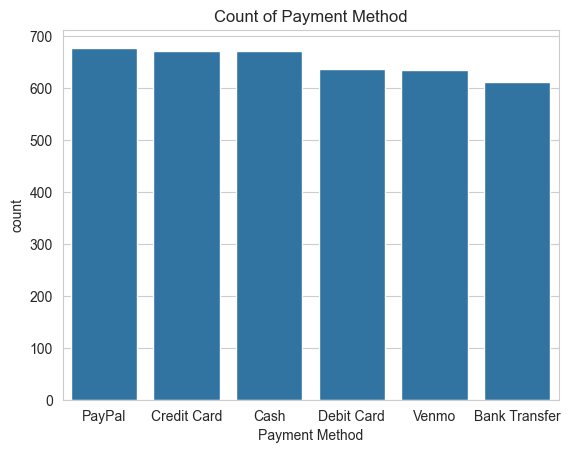

In [30]:

sns.countplot(x='Payment Method', data=df, order=df['Payment Method'].value_counts().index)
plt.title('Count of Payment Method')

plt.show()

### Question 3
Show the number of purchases made by each `Gender` in each `Season`.
- Create a **grouped bar chart/ Pie chart using Matplotlib**.
- Also plot a **stacked countplot using Seaborn**.

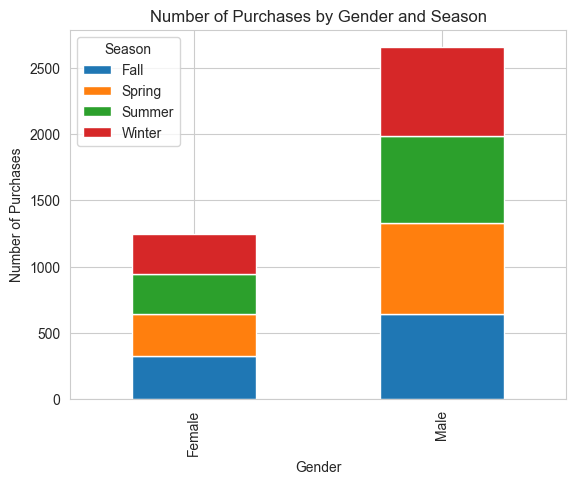

In [31]:
gender_season_counts = df.groupby(['Gender', 'Season']).size().unstack()
gender_season_counts.plot(kind='bar', stacked=True)
plt.title('Number of Purchases by Gender and Season')
plt.xlabel('Gender')
plt.ylabel('Number of Purchases')
plt.show()

### Question 4
Create a heatmap showing the correlation between all numeric columns.
- Use `sns.heatmap`.
- Interpret the relationship between `Previous Purchases`, `Purchase Amount`, and `Review Rating`.

In [32]:
data=sns.load_dataset("shopping_trends_updated.csv")

numeric_cols = data.select_dtypes(include=['float64', 'int64'])
corr = data[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

ValueError: 'shopping_trends_updated.csv' is not one of the example datasets.

### Question 5
Create a scatter plot of `Age` vs `Purchase Amount (USD)`, color-coded by `Gender`.
- Use **Matplotlib and Seaborn side-by-side**.
- Add a trend line in Seaborn using `regplot`.

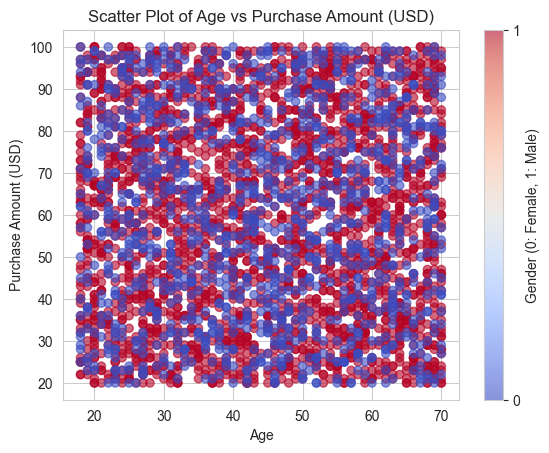

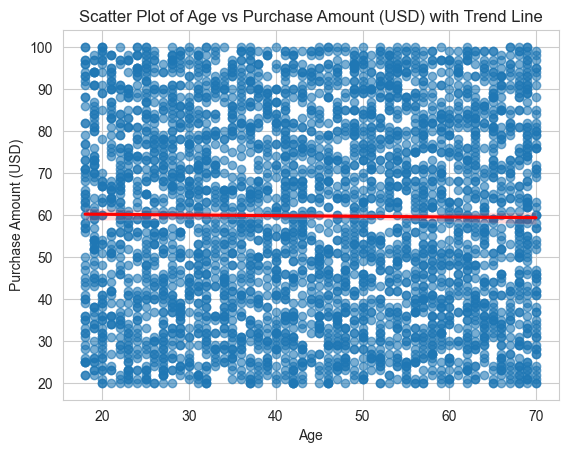

In [35]:
# plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
plt.scatter(df['Age'], df['Purchase Amount (USD)'], c=df['Gender'].apply(lambda x: 1 if x == 'Male' else 0), cmap='coolwarm', alpha=0.6)
plt.title('Scatter Plot of Age vs Purchase Amount (USD)')
plt.xlabel('Age')
plt.ylabel('Purchase Amount (USD)')
plt.colorbar(ticks=[0, 1], label='Gender (0: Female, 1: Male)')
plt.show()

# Create a scatter plot using Seaborn
# plt.figure(figsize=(12, 6))
sns.regplot(x='Age', y='Purchase Amount (USD)', data=df, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Scatter Plot of Age vs Purchase Amount (USD) with Trend Line')
plt.show()

### Question 6
How does the average review rating differ across different item `Categories` and `Sizes`?
- Use **Seaborn’s heatmap or pivot heatmap** to visualize.
- Use Pandas pivot table to prepare the data.

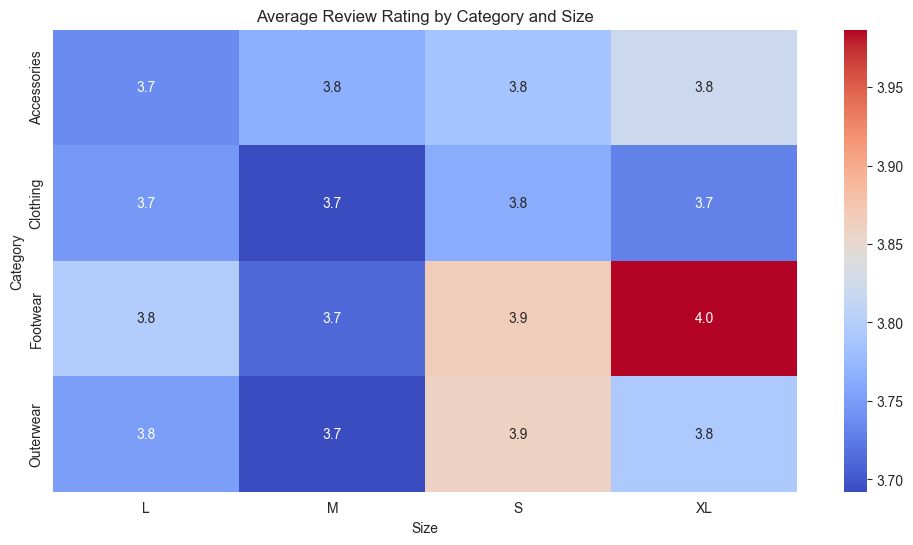

In [36]:
pivot_table = df.pivot_table(values='Review Rating', index='Category', columns='Size', aggfunc='mean')

# Create a heatmap using Seaborn
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Average Review Rating by Category and Size')
plt.show()

### Question 7
Which combinations of `Season` and `Shipping Type` lead to the highest average `Purchase Amount (USD)`?
- Show this as a **grouped bar chart** and as a **heatmap**.

<Figure size 1200x600 with 0 Axes>

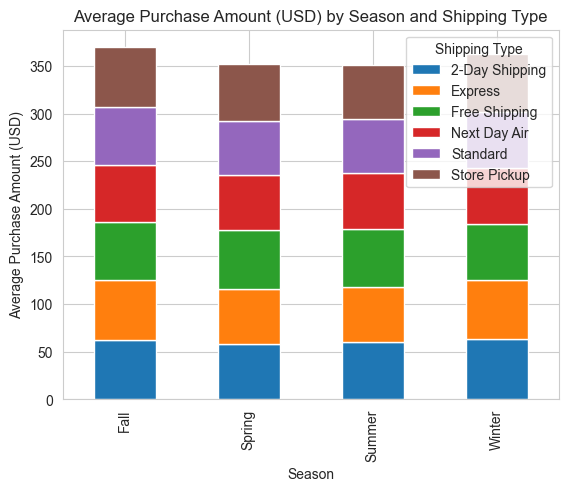

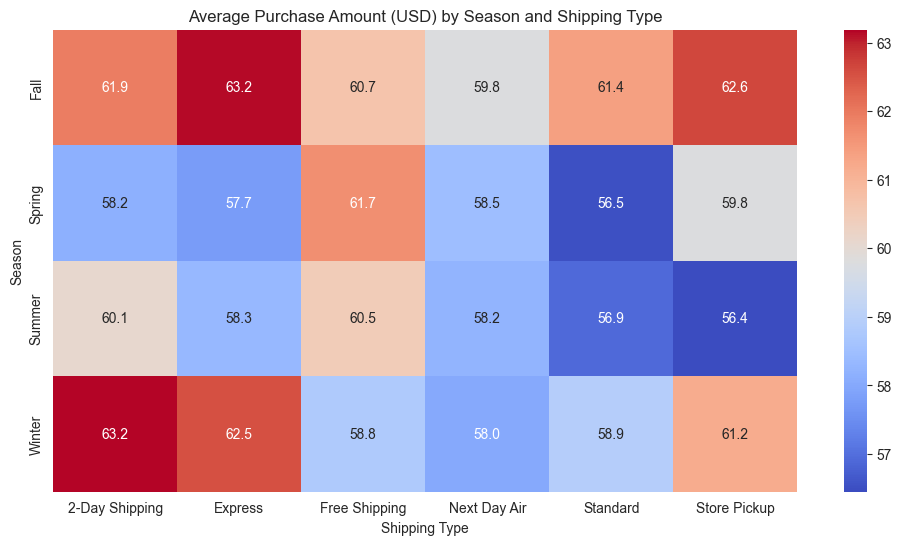

In [37]:
grouped_data = df.groupby(['Season', 'Shipping Type'])['Purchase Amount (USD)'].mean().unstack()

# Create a grouped bar chart using Matplotlib
plt.figure(figsize=(12, 6))
grouped_data.plot(kind='bar', stacked=True)
plt.title('Average Purchase Amount (USD) by Season and Shipping Type')
plt.xlabel('Season')
plt.ylabel('Average Purchase Amount (USD)')
plt.legend(title='Shipping Type')
plt.show()

# Create a heatmap using Seaborn
plt.figure(figsize=(12, 6))
sns.heatmap(grouped_data, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Average Purchase Amount (USD) by Season and Shipping Type')
plt.xlabel('Shipping Type')
plt.ylabel('Season')
plt.show()


### Question 8
Plot a violin plot of `Review Rating` by `Gender` for each `Subscription Status`.
- Use `sns.violinplot` with `hue`.

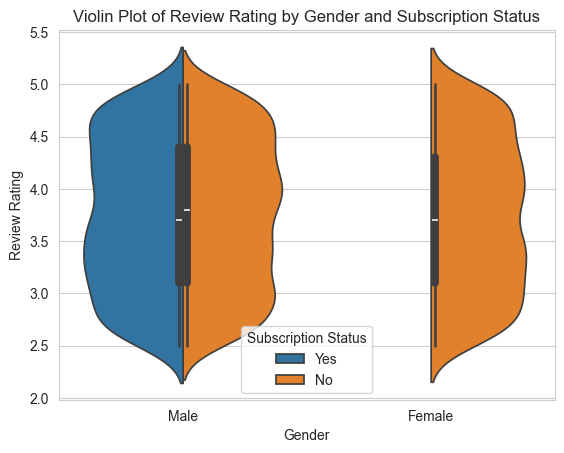

In [38]:
sns.violinplot(x='Gender', y='Review Rating', hue='Subscription Status', data=df, split=True)
plt.title('Violin Plot of Review Rating by Gender and Subscription Status')
plt.show()

### Question 9
What are the top 5 most purchased `Item Purchased` by total `Purchase Amount`?
- Use Pandas aggregation, plot with **Matplotlib pie and bar** charts.

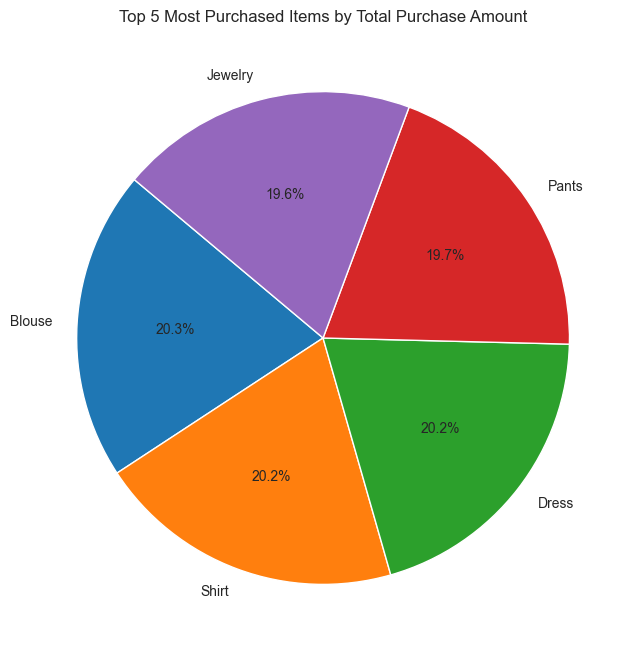

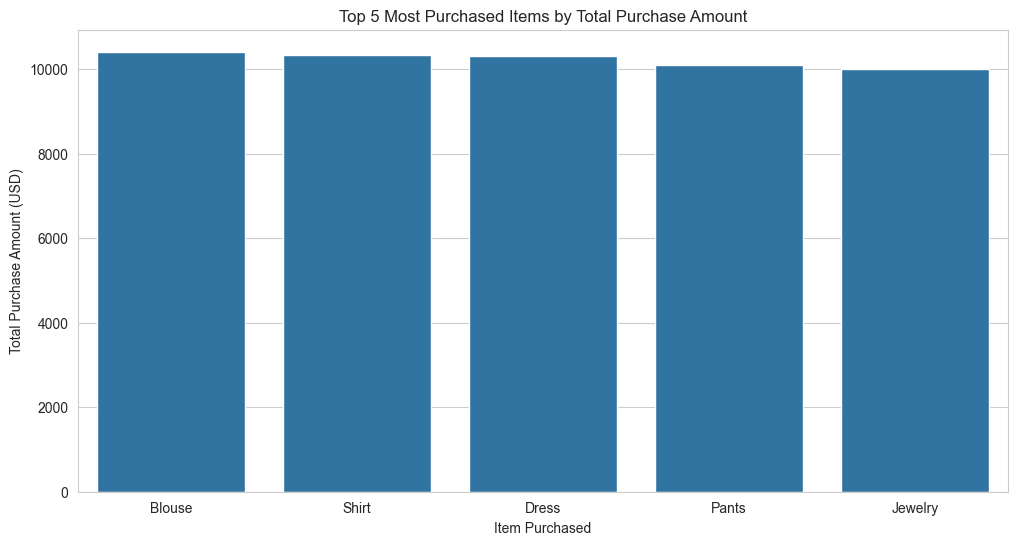

In [39]:
top_items = df.groupby('Item Purchased')['Purchase Amount (USD)'].sum().nlargest(5)
# Create a pie chart using Matplotlib
plt.figure(figsize=(8, 8))
plt.pie(top_items, labels=top_items.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Most Purchased Items by Total Purchase Amount')
plt.show()

# Create a bar chart using Matplotlib
plt.figure(figsize=(12, 6))
sns.barplot(x=top_items.index, y=top_items.values)
plt.title('Top 5 Most Purchased Items by Total Purchase Amount')
plt.xlabel('Item Purchased')
plt.ylabel('Total Purchase Amount (USD)')
plt.show()

### Question 10
Which `Location` has the highest average `Purchase Amount`, and how does it relate to `Previous Purchases` (plot only top 5 purchase amount location)?
- Use a **Seaborn scatterplot** with size/marker variation.

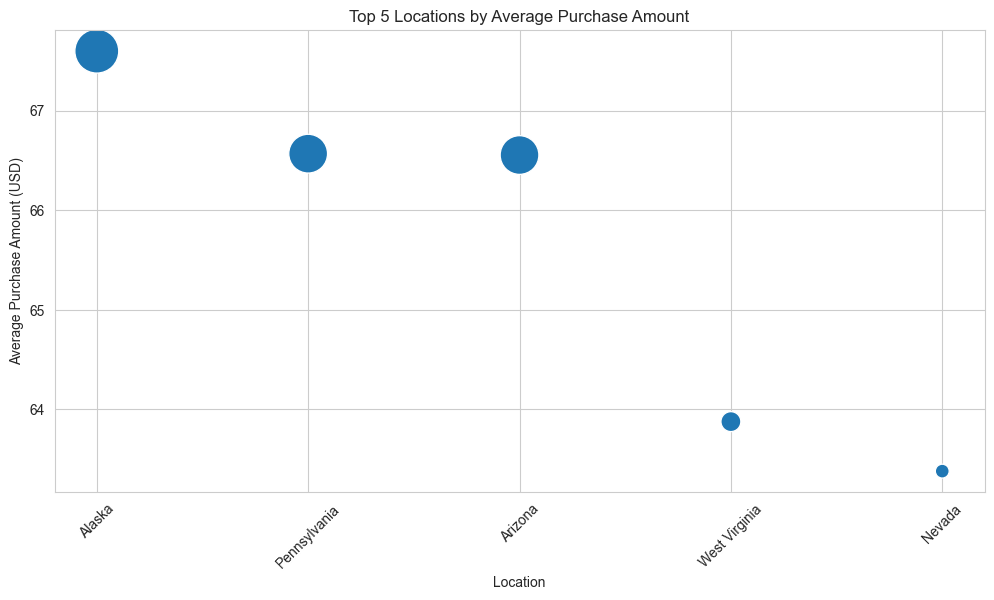

In [40]:
avg_purchase_location = df.groupby('Location')['Purchase Amount (USD)'].mean().nlargest(5)

# Create a scatter plot using Seaborn
plt.figure(figsize=(12, 6))
sns.scatterplot(x=avg_purchase_location.index, y=avg_purchase_location.values, size=avg_purchase_location.values, sizes=(100, 1000), legend=False)
plt.title('Top 5 Locations by Average Purchase Amount')
plt.xlabel('Location')
plt.ylabel('Average Purchase Amount (USD)')
plt.xticks(rotation=45)
plt.show()

### Question 11
Using a crosstab, find how `Gender` and `Size` interact.
- Plot using `sns.heatmap`.

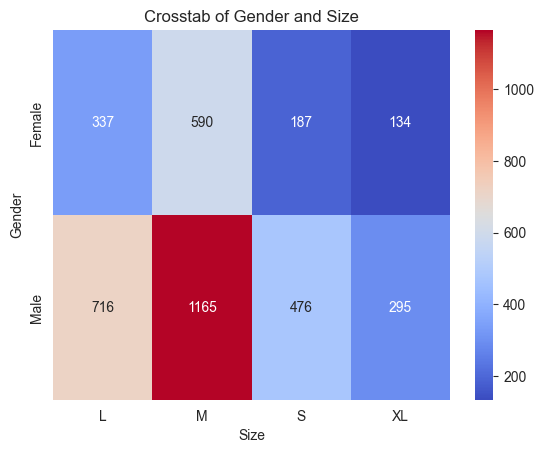

In [42]:
import pandas as pd
crosstab = pd.crosstab(df['Gender'], df['Size'])
sns.heatmap(crosstab, annot=True, cmap='coolwarm', fmt='d')
plt.title('Crosstab of Gender and Size')
plt.xlabel('Size')
plt.ylabel('Gender')
plt.show()

### Question 12
How does the frequency of purchases column influence the use of promo codes?
- Create a **stacked bar chart** using Matplotlib and compare with a **Seaborn countplot**.

In [ ]:
# # Create a stacked bar chart using Matplotlib

df.groupby(['Frequency of Purchases', 'Used Promo Code']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Promo Code Usage by Purchase Frequency')
plt.xlabel('Frequency of Purchases')
plt.ylabel('Count')
plt.legend(title='Used Promo Code')
plt.show()

# Create a countplot using Seaborn

sns.countplot(x='Frequency of Purchases', hue='Used Promo Code', data=df)
plt.title('Countplot of Promo Code Usage by Purchase Frequency')
plt.xlabel('Frequency of Purchases')
plt.ylabel('Count')
plt.legend(title='Used Promo Code')
plt.show()

### Question 13
Using a pairplot, show pairwise relationships between numeric columns segmented by `Gender`.
- Use `sns.pairplot` with `hue="Gender"`.

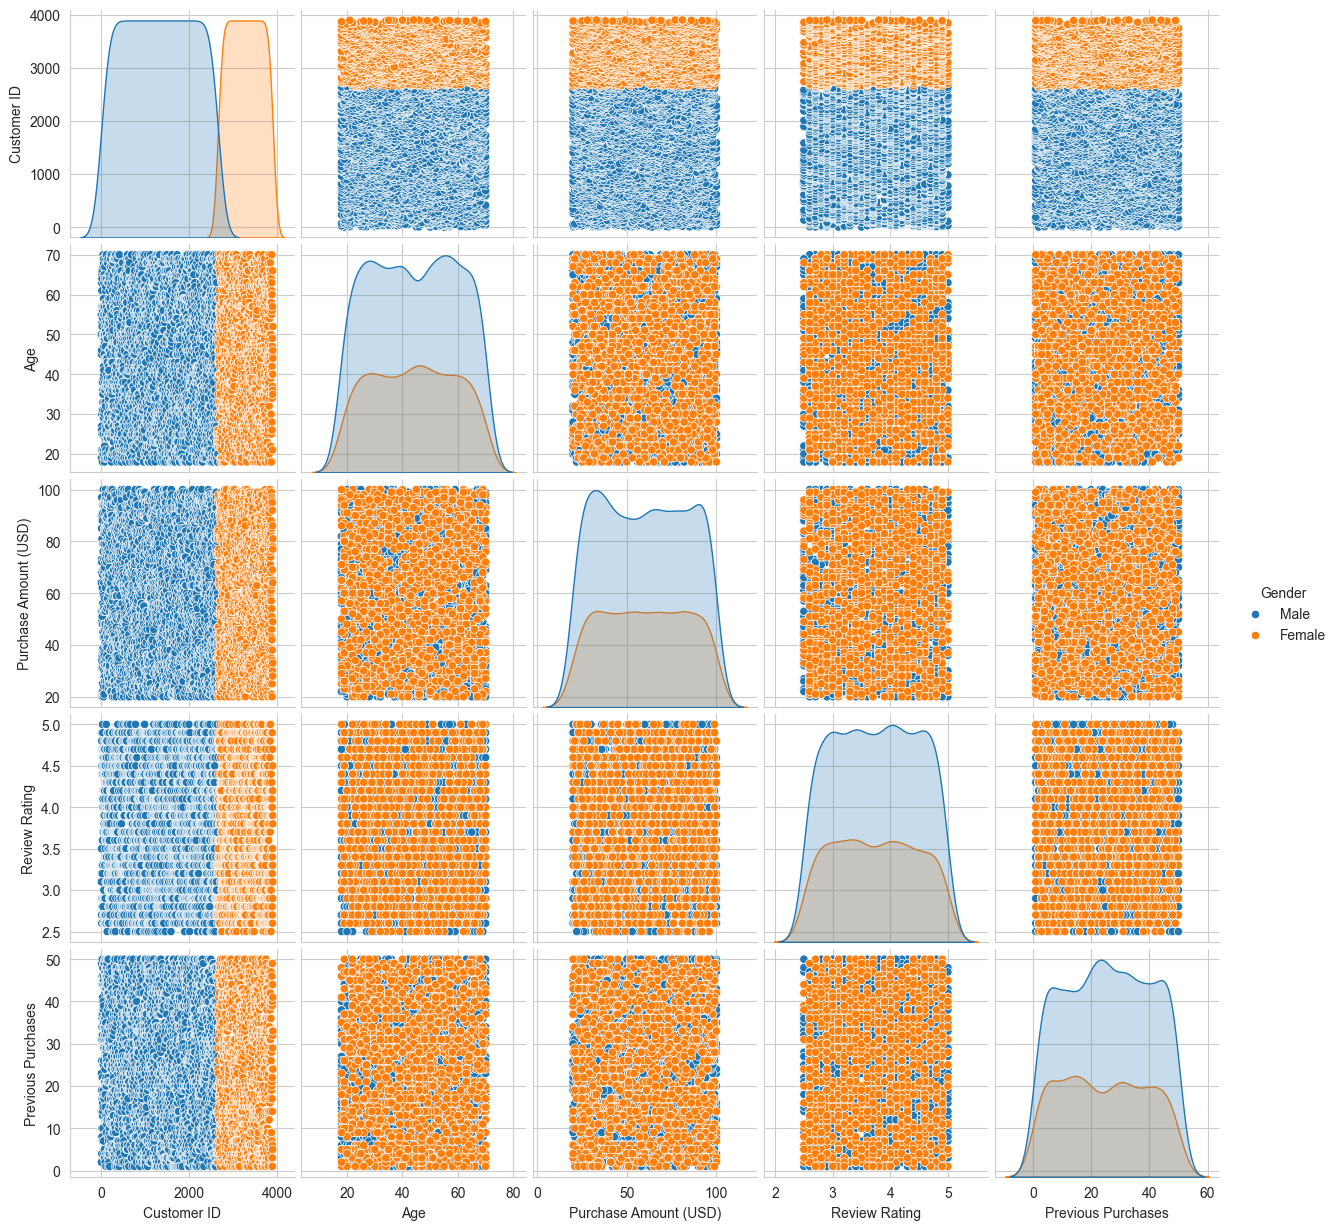

In [47]:
sns.pairplot(df, hue="Gender")